Code for making structure classification predictions through API

In [1]:
import os
from citrination_client import CitrinationClient
import pandas as pd
import pymatgen as mg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import ternary

client = CitrinationClient(os.environ['CITRINATION_API_KEY'],'https://citrination.com')

In [17]:
#predict structure for different compositions
path = 'output'
design_file = 'design_formulas_180329.csv'
design_inp = pd.read_csv(os.path.join(path,design_file))

#default values for all inputs besides formula
inpcols = {'Average Target Pulses/Cycle (Step Pulsed Laser Deposition)':50,
           'Temperature Gradient (Step Pulsed Laser Deposition)':'N',
           'Temperature (Step Pulsed Laser Deposition)':850,
           'Number of Cycles (Step Pulsed Laser Deposition)':500,
           'Laser Pulse Frequency (Step Pulsed Laser Deposition)':20,
           'Laser Energy (Step Pulsed Laser Deposition)':600,
           'Laser Voltage (Step Pulsed Laser Deposition)':19,
           'Substrate (Step Pulsed Laser Deposition)':'SiO2',
           'Deposition Pressure (Step Pulsed Laser Deposition)':50,
           'Property AB_mass_ratio':0,
           'Property A_avg_ion_radius':0,
           'Property B_avg_ion_radius':0,
           'Property A_avg_at_radius':0,
           'Property B_avg_at_radius':0,
           'Property B_avg_X':0,
           'Property A_avg_X':0, 
           'Property AB_at_radius_ratio':0,
           'Property AB_ion_radius_ratio':0,
           'Property A_avg_mass':0,
           'Property AB_X_ratio':0,
           'Property B_avg_mass':0,
           'Property AB_site_ratio':0,
           'Point':1,
           'Row':1,
           'Column':1,
           'X position':203,
           'Y position':44}

for k,v in inpcols.items():
    design_inp.insert(len(design_inp.columns),k,v)
design_inp

#calculate formula-specific features
Asite = ['Ba']
Bsite = ['Co','Fe','Y','Zr']

for i in design_inp.index:
    comp = mg.Composition(design_inp.loc[i,'formula'])
    Asum = 0
    Bsum = 0
    for x in comp.elements:
        if str(x) in Asite: 
            Asum += comp.get_el_amt_dict()[str(x)]
        elif str(x) in Bsite:
            Bsum += comp.get_el_amt_dict()[str(x)]
    for x in comp.elements:
        if str(x) in Asite:
            wt = comp.get_el_amt_dict()[str(x)]/Asum #weight for wtd average
            design_inp.loc[i,'Property A_avg_X'] += wt*x.X
            design_inp.loc[i,'Property A_avg_at_radius'] += wt*x.atomic_radius
            design_inp.loc[i,'Property A_avg_ion_radius'] += wt*x.average_ionic_radius
            design_inp.loc[i,'Property A_avg_mass'] += wt*x.atomic_mass
            
        elif str(x) in Bsite:
            wt = comp.get_el_amt_dict()[str(x)]/Bsum #weight for wtd average
            design_inp.loc[i,'Property B_avg_X'] += wt*x.X
            design_inp.loc[i,'Property B_avg_at_radius'] += wt*x.atomic_radius
            design_inp.loc[i,'Property B_avg_ion_radius'] += wt*x.average_ionic_radius
            design_inp.loc[i,'Property B_avg_mass'] += wt*x.atomic_mass
            
design_inp['Property AB_site_ratio'] = Asum/Bsum
design_inp['Property AB_at_radius_ratio'] = design_inp['Property A_avg_at_radius']/design_inp['Property B_avg_at_radius']
design_inp['Property AB_ion_radius_ratio'] = design_inp['Property A_avg_ion_radius']/design_inp['Property B_avg_ion_radius']
design_inp['Property AB_mass_ratio'] = design_inp['Property A_avg_mass']/design_inp['Property B_avg_mass']
design_inp['Property AB_X_ratio'] = design_inp['Property A_avg_X']/design_inp['Property B_avg_X']

design_inp

,formula,Average Target Pulses/Cycle (Step Pulsed Laser Deposition),Temperature Gradient (Step Pulsed Laser Deposition),Temperature (Step Pulsed Laser Deposition),Number of Cycles (Step Pulsed Laser Deposition),Laser Pulse Frequency (Step Pulsed Laser Deposition),Laser Energy (Step Pulsed Laser Deposition),Laser Voltage (Step Pulsed Laser Deposition),Substrate (Step Pulsed Laser Deposition),Deposition Pressure (Step Pulsed Laser Deposition),...,Property AB_ion_radius_ratio,Property A_avg_mass,Property AB_X_ratio,Property B_avg_mass,Property AB_site_ratio,Point,Row,Column,X position,Y position
0,Ba0.9Co0.0Fe0.5Y0.0Zr0.5O3,50,N,850,500,20,600,19,SiO2,50,...,1.740146,137.327,0.563291,73.534500,0.900901,1,1,1,203,44
1,Ba0.9Co0.0Fe0.333Y0.0Zr0.667O3,50,N,850,500,20,600,19,SiO2,50,...,1.737604,137.327,0.594721,79.442793,0.900901,1,1,1,203,44
2,Ba0.9Co0.0Fe0.25Y0.0Zr0.75O3,50,N,850,500,20,600,19,SiO2,50,...,1.736344,137.327,0.611684,82.379250,0.900901,1,1,1,203,44
3,Ba0.9Co0.0Fe0.2Y0.0Zr0.8O3,50,N,850,500,20,600,19,SiO2,50,...,1.735585,137.327,0.622378,84.148200,0.900901,1,1,1,203,44
4,Ba0.9Co0.0Fe0.167Y0.0Zr0.833O3,50,N,850,500,20,600,19,SiO2,50,...,1.735085,137.327,0.629643,85.315707,0.900901,1,1,1,203,44
5,Ba0.9Co0.0Fe0.143Y0.0Zr0.857O3,50,N,850,500,20,600,19,SiO2,50,...,1.734721,137.327,0.635034,86.164803,0.900901,1,1,1,203,44
6,Ba0.9Co0.0Fe0.125Y0.0Zr0.875O3,50,N,850,500,20,600,19,SiO2,50,...,1.734449,137.327,0.639138,86.801625,0.900901,1,1,1,203,44
7,Ba0.9Co0.0Fe0.111Y0.0Zr0.889O3,50,N,850,500,20,600,19,SiO2,50,...,1.734237,137.327,0.642367,87.296931,0.900901,1,1,1,203,44
8,Ba0.9Co0.0Fe0.1Y0.0Zr0.9O3,50,N,850,500,20,600,19,SiO2,50,...,1.734070,137.327,0.644928,87.686100,0.900901,1,1,1,203,44
9,Ba0.9Co0.0Fe0.667Y0.0Zr0.333O3,50,N,850,500,20,600,19,SiO2,50,...,1.742695,137.327,0.535017,67.626207,0.900901,1,1,1,203,44


In [18]:
inputs = design_inp.to_dict('records')    
    
candidates = []
for i in [0,1000,2000,3000]:
    cand = client.predict(view_id,inputs[i:i+1000])['candidates']
    candidates += cand

In [19]:
compresults = pd.DataFrame(columns=['formula','Co','Fe','Y','Zr','structure','uncertainty'])
for i, cand in enumerate(candidates):
    comp = mg.Composition(cand['formula'][0])
    compresults.loc[i,'formula'] = cand['formula'][0]
    compresults.loc[i,'structure':'uncertainty'] = cand['Property Structure']
    for el in Bsite:
        compresults.loc[i,el] = comp.get_el_amt_dict()[el]

In [35]:
#set crystalline probability
compresults['cryst_prob'] = np.where(compresults['structure']=='Crystalline',1-compresults['uncertainty'],compresults['uncertainty'])


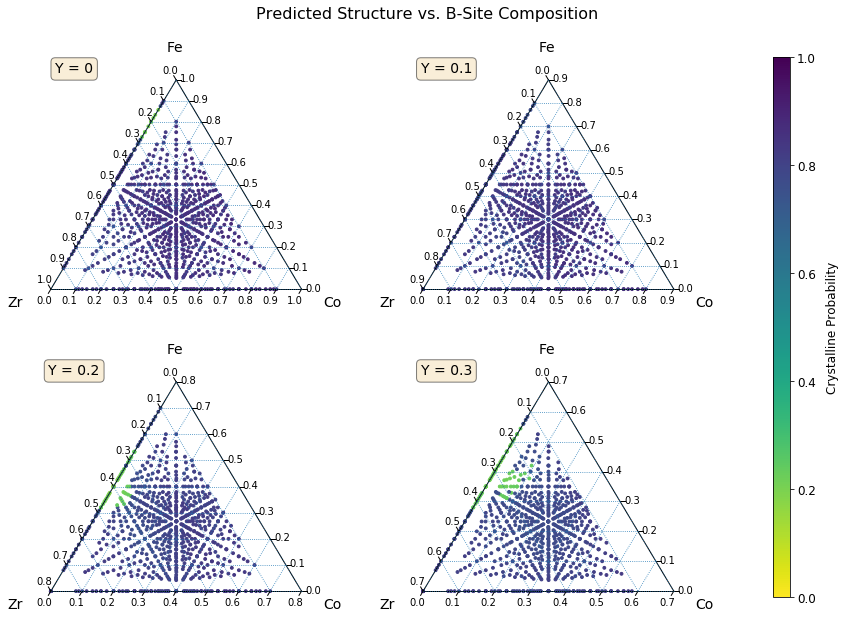

In [34]:
fig, axes = plt.subplots(2,2,figsize=(12,10))
Y_frac = [0,0.1,0.2,0.3]
# full_colors = compresults.loc[:,'fwhm_110'].values
vmin=0
vmax=1


for i, nY in enumerate(Y_frac):
    df = compresults[compresults['Y']==nY]
    points = df.loc[:,['Co','Fe','Zr']].values
    #colors = df['structure'].map({'Crystalline':vmin,'Amorphous':vmax}).replace(np.nan,10).values
    colors = (1-df['cryst_prob']).values
    
    ax=axes[int(i/2), i%2]
    
    scale = 1 - nY #point coords must sum to scale
    tfig, tax = ternary.figure(scale=scale,ax=ax)
    cmap = plt.cm.viridis_r
    tax.scatter(points,s=8,vmin=vmin,vmax=vmax,colormap=cmap,
                colorbar=False,c=colors)
    tax.boundary(linewidth=1.0)
    tax.clear_matplotlib_ticks()
    tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats='%.1f',offset=0.02)
    tax.gridlines(multiple=0.1,linewidth=0.8)
    tax.bottom_axis_label('Co',offset=0.1,fontsize=14, position=(1.05,0.03,0))
    tax.right_axis_label('Fe',offset=0.2,fontsize=14, position=(-0.13,1.25,0), rotation=0)
    tax.left_axis_label('Zr',offset=0.2,fontsize=14, position=(-0.10,0.03,1), rotation=0)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    tax.set_title('Y = {}'.format(nY),fontsize=14,x=0.13,y=0.97, bbox=props)
    tax._redraw_labels()
    ax.axis('off')
    
plt.suptitle('Predicted Structure vs. B-Site Composition',size=16,y=0.97)

#add a single colorbar
#make an axis for colorbar to control position/size
cbaxes = fig.add_axes([0.9,0.15,0.02,0.75]) #[left, bottom, width, height]
#code from colormapping.colorbar_hack
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=axes, cax = cbaxes)
cb.set_label('Crystalline Probability', fontsize=12, labelpad=10)
cb.ax.tick_params(labelsize=12)

fig.subplots_adjust(left=0.05,wspace=0.35, hspace=0.25, right=0.8)

plt.savefig(os.path.join('plots','structure_ternary_pred_180425.png'),dpi=350)